# WEB SCRAPPING

In [ ]:

import pandas as pd #for convert into dataframe
from bs4 import BeautifulSoup #for scrao a desired data from html page
from selenium import webdriver #for get a html source page

# Set up the Selenium WebDriver (e.g., Chrome)
driver = webdriver.Chrome()
base_url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"

# Initialize lists to store data
titles =[] 
ratings =[]
reviews =[]
cities =[]
names =[]
dates =[]
likes =[]
dislikes =[]
for page in range(1, 395):  # Adjust the range as needed
    # Load the webpage
    driver.get(f"{base_url}&page={page}")

    # Get the full HTML code
    html = driver.page_source

    # Parse the HTML with BeautifulSoup
    bs = BeautifulSoup(html, "html.parser")

    # Scrape the desired data
    content = bs.find_all("p", class_="z9E0IG")
    titles.extend([element.get_text() for element in content])

    name = bs.find_all("p", class_="_2NsDsF AwS1CA")
    names.extend([na.get_text() for na in name])
    
    rating = bs.find_all("div", class_="XQDdHH Ga3i8K")
    ratings.extend([rate.get_text() for rate in rating])
    
    review = bs.find_all("div", class_="ZmyHeo")
    reviews.extend([rev.get_text().replace("READ MORE","").strip() for rev in review])
    
    city = bs.find_all("p", class_="MztJPv")
    cities.extend([cit.find_all('span')[1].get_text().split().pop(1) for cit in city])

    date = bs.find_all("p", class_="_2NsDsF")
    dates.extend([dat.get_text() for dat in date])

    like = bs.find_all('div', class_="_6kK6mk")
    likes.extend(lik.get_text() for lik in like)
    
    dislike = bs.find_all('div', class_="_6kK6mk")
    dislikes.extend(dis.get_text() for dis in dislike)

# Extract likes and dislikes correctly
like = likes[::2]
dislike = dislikes[1::2]
dates_only = [dates[i] for i in range(len(dates)) if i % 2 == 1]

# Ensure all lists have the same length
min_length = min(len(names), len(ratings), len(titles), len(cities), len(dates_only), len(reviews), len(like), len(dislike))


names = names[:min_length]
ratings = ratings[:min_length]
titles = titles[:min_length]
cities = cities[:min_length]
dates_only = dates_only[:min_length]
reviews = reviews[:min_length]
like = like[:min_length]
dislike = dislike[:min_length]

# Close the browser
driver.quit()

# Create a DataFrame
df1 = pd.DataFrame({
    "Names": names,
    "Rating": ratings,
    "Titles": titles,
    "Cities": cities,
    "Dates": dates_only,
    "Reviews": reviews,
    "Likes": like,
    "Dislikes": dislike
})

print(df1)
df1.to_csv("Iphone 15 blue flipkart_customers_reviews(Web Srapping).csv", index=False)


# LOAD AND CLEAN DATA:

LOAD TO DATAFRAME:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Iphone 15 blue flipkart_customers_reviews(Web Srapping).csv")


In [4]:
#Information About The Data Set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Names     214 non-null    object
 1   Rating    214 non-null    int64 
 2   Titles    214 non-null    object
 3   Cities    214 non-null    object
 4   Dates     214 non-null    object
 5   Reviews   214 non-null    object
 6   Likes     214 non-null    int64 
 7   Dislikes  214 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 13.5+ KB


In [4]:
#To Check How Many Rows And Columns In A Data Set:
df.shape

(214, 8)

In [5]:
#To Check IS There Any Duplicates in a Data Set And Remove A Duplicates:
print(df.duplicated().sum())


7


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#To Check Is There Any Null Values In The Dataset:
df.isnull().sum()

Names       0
Rating      0
Titles      0
Cities      0
Dates       0
Reviews     0
Likes       0
Dislikes    0
dtype: int64

#To Convert All Reviews To Lower Case:

In [8]:
df.head(2)

,Names,Rating,Titles,Cities,Dates,Reviews,Likes,Dislikes
0,Ajin V,5,Mind-blowing purchase,Balaghat,11 months ago,High quality camera😍,7431,1807
1,bijaya mohanty,5,Worth every penny,Baleshwar,4 months ago,Just go for it.Amazing one.Beautiful camera wi...,1174,264


#Convert into lowercase

In [9]:
df["Reviews"]=df["Reviews"].apply(lambda txt:txt.lower())
df.head(2)

,Names,Rating,Titles,Cities,Dates,Reviews,Likes,Dislikes
0,Ajin V,5,Mind-blowing purchase,Balaghat,11 months ago,high quality camera😍,7431,1807
1,bijaya mohanty,5,Worth every penny,Baleshwar,4 months ago,just go for it.amazing one.beautiful camera wi...,1174,264


#Cleaning The Puntuations And A Emojis

In [10]:
import re #regex

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove emojis
        text = re.sub(r'[^\w\s]', '', text)  # Remove all special characters including emojis
        text = text.strip()  # Trim whitespace from the start and end
        return text  # Return the cleaned text
    return text  # Return the original input if it's not a string

# Apply the function to the DataFrame
df['Reviews'] = df['Reviews'].apply(clean_text)

# Check the output
df.head(2)

,Names,Rating,Titles,Cities,Dates,Reviews,Likes,Dislikes
0,Ajin V,5,Mind-blowing purchase,Balaghat,11 months ago,high quality camera,7431,1807
1,bijaya mohanty,5,Worth every penny,Baleshwar,4 months ago,just go for itamazing onebeautiful camera with...,1174,264


#To Remove The Stop Words :

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


stop_words=stopwords.words("english")
df['Reviews'] = df['Reviews'].apply(lambda txt: ' '.join([word for word in txt.split() if word.lower() not in stop_words]))
df.head(2)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,Names,Rating,Titles,Cities,Dates,Reviews,Likes,Dislikes
0,Ajin V,5,Mind-blowing purchase,Balaghat,11 months ago,high quality camera,7431,1807
1,bijaya mohanty,5,Worth every penny,Baleshwar,4 months ago,go itamazing onebeautiful camera super fast pr...,1174,264


#Lemmatization for Each Words

In [12]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the WordNet and punkt resources
nltk.download('punkt')
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    return ' '.join(lemmatized_words)
df['Lemmatized_Reviews'] = df['Reviews'].apply(lemmatize_text)
# Apply the stemming function to the 'Reviews' column

# Display the updated DataFrame
print(df[['Reviews', 'Lemmatized_Reviews']].head(2))

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


                                             Reviews  \
0                                high quality camera   
1  go itamazing onebeautiful camera super fast pr...   

                                  Lemmatized_Reviews  
0                                high quality camera  
1  go itamazing onebeautiful camera super fast pr...  


# SENTIMENT SCORES:

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()
def sentiment_score(txt):
    return sia.polarity_scores(txt)
df["Sentiment Scores"]=df["Lemmatized_Reviews"].apply(sentiment_score)

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#Extracting The Sentimental Scores To Individual Columns


In [14]:
df["Negative"] = df["Sentiment Scores"].apply(lambda x: x['neg'])
df["Positive"] = df["Sentiment Scores"].apply(lambda x: x['pos'])
df["Neutral"] = df["Sentiment Scores"].apply(lambda x: x['neu'])
df["Compounds"] = df["Sentiment Scores"].apply(lambda x: x['compound'])
df.head(2)

,Names,Rating,Titles,Cities,Dates,Reviews,Likes,Dislikes,Lemmatized_Reviews,Sentiment Scores,Negative,Positive,Neutral,Compounds
0,Ajin V,5,Mind-blowing purchase,Balaghat,11 months ago,high quality camera,7431,1807,high quality camera,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
1,bijaya mohanty,5,Worth every penny,Baleshwar,4 months ago,go itamazing onebeautiful camera super fast pr...,1174,264,go itamazing onebeautiful camera super fast pr...,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.0,0.394,0.606,0.5994


# VISUALIZATION:

#BAR CHART FOR SENTIMENT SCORE:


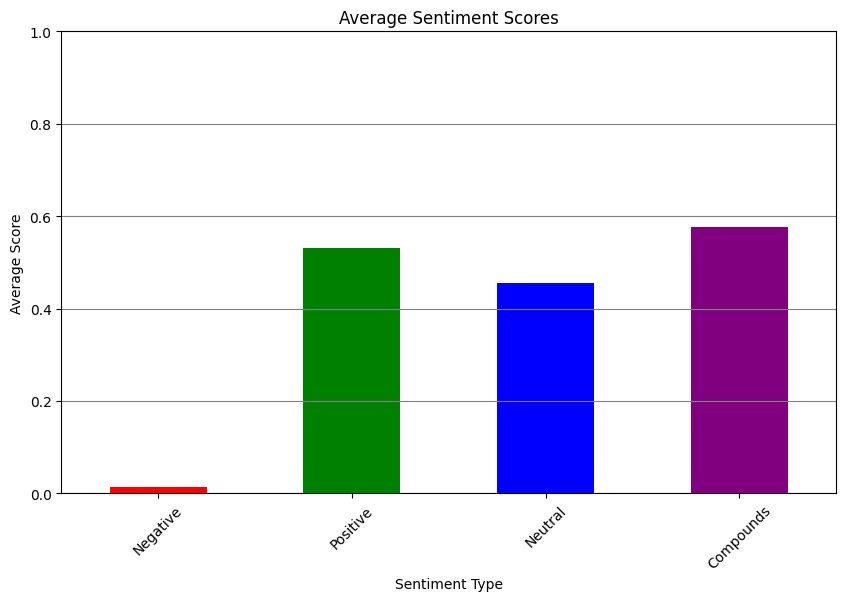

In [23]:

import matplotlib.pyplot as plt #for visualization

# Calculate average sentiment scores
avg_scores = df[['Negative', 'Positive', 'Neutral', 'Compounds']].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color=['red', 'green', 'blue', 'purple'])
plt.title('Average Sentiment Scores')
plt.ylabel('Average Score')
plt.xlabel('Sentiment Type')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since scores range from 0 to 1
plt.grid(axis='y',color='grey')
plt.show()


#HISTPLOT FOR RATING:

Text(0, 0.5, 'Frequency')

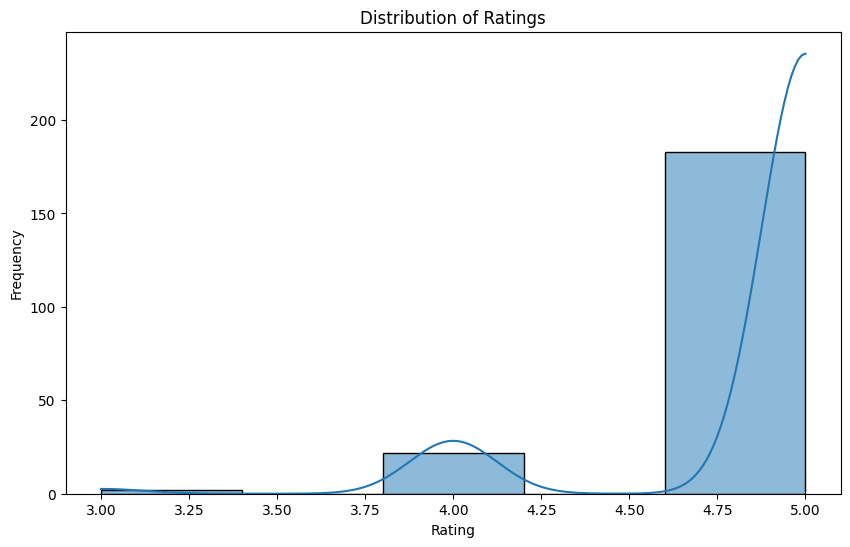

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')